### Importing modules

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [62]:
from sklearn.datasets import load_iris

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### Loading the dataset

In [63]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [64]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Defining Target and predictors

In [65]:
X = iris.data[:,:2]
y = iris.target

### Having a look at our Dataset through Scatter plot

Text(0, 0.5, 'Sepal Width')

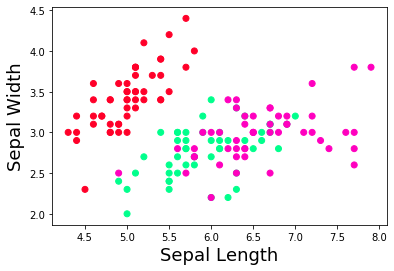

In [66]:
plt.scatter(X[:,0],X[:,1], c = y , cmap = 'gist_rainbow')
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)

### Instantiating and Fitting our K-means Cluster model, using 3 clusters

In [67]:
km = KMeans(n_clusters = 3,n_jobs = 4, random_state = 21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

### Identifying center points of the data

In [68]:
centers = km.cluster_centers_
centers

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

### Comparing Actual data with Clustered results

Text(0.5, 1.0, 'Predicted')

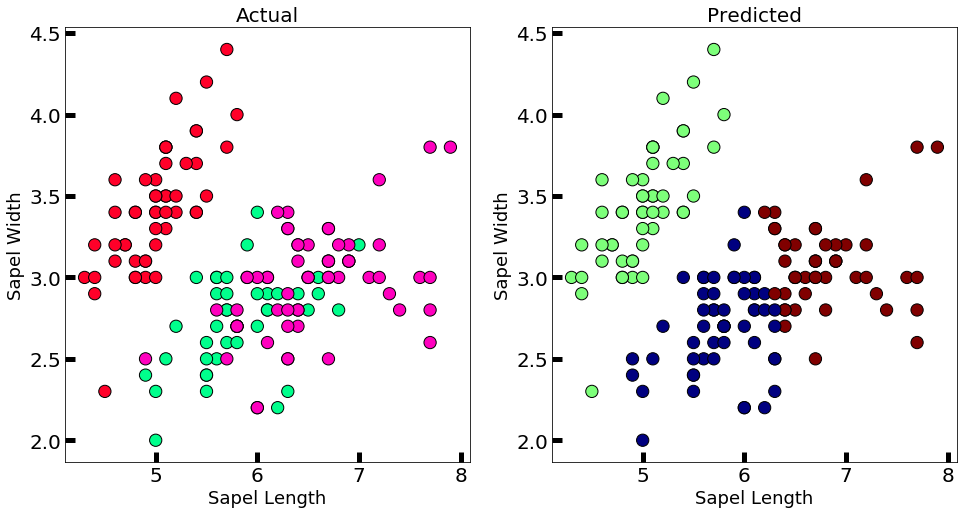

In [69]:
#this will tell us to which cluster does the data observations belong.

new_labels = km.labels_

#Plot the identified clusters and compare with the answers

fig,axes = plt.subplots(1,2,figsize = (16,8))

axes[0].scatter(X[:,0],X[:,1], c = y, cmap = 'gist_rainbow',edgecolor = 'k', s = 150)
axes[0].set_xlabel('Sapel Length', fontsize = 18)
axes[0].set_ylabel('Sapel Width', fontsize = 18)
axes[0].tick_params(direction = 'in', length =10, width = 5, colors = 'k', labelsize = 20)
axes[0].set_title('Actual',fontsize = 20)

axes[1].scatter(X[:,0],X[:,1], c = new_labels, cmap = 'jet', edgecolor = 'k', s = 150)
axes[1].set_xlabel('Sapel Length', fontsize = 18)
axes[1].set_ylabel('Sapel Width', fontsize = 18)
axes[1].tick_params(direction = 'in', length =10, width = 5, colors = 'k', labelsize = 20)
axes[1].set_title('Predicted',fontsize = 20)




### Checking the most suitable value for K

In [70]:
SSE = []

index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(i, kmeans.inertia_)

1 130.47526666666667
2 58.20409278906671
3 37.05070212765958
4 27.9902120383037
5 21.04161783226586
6 17.818821428571432
7 14.815831630102675
8 12.937328851540618
9 11.15757167832168


Text(0, 0.5, 'SSE')

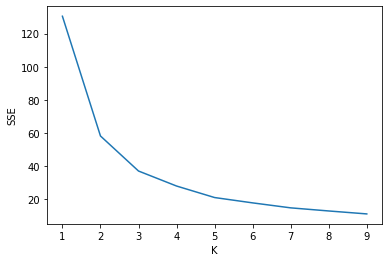

In [71]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SSE')

### Insight: We realize that K = 3 is most appropriate.